In [135]:
from preamble import *
%matplotlib inline

## 소개

### 왜 머신 러닝인가?
#### 머신 러닝으로 풀 수 있는 문제
#### 문제와 데이터를 이해하기

### 왜 파이썬인가?

### scikit-learn
#### Scikit-learn 설치

### 필수 라이브러리와 도구들
#### 주피터 노트북
#### NumPy

In [136]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


#### SciPy

In [137]:
from scipy import sparse

# 대각선 원소는 1이고 나머지는 0인 2차원 NumPy 배열을 만듭니다.
eye = np.eye(4)
print("NumPy 배열:\n{}".format(eye))

NumPy 배열:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [138]:
# NumPy 배열을 CSR 포맷의 SciPy 희박 행렬로 변환합니다.
# 0이 아닌 원소만 저장됩니다.
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy의 CSR 행렬:\n{}".format(sparse_matrix))


SciPy의 CSR 행렬:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [139]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO 표현:\n{}".format(eye_coo))

COO 표현:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


#### matplotlib

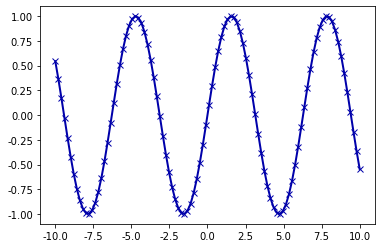

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt

# -10에서 10까지 100개의 간격으로 나뉘어진 배열을 생성합니다.
x = np.linspace(-10, 10, 100)
# 사인 함수를 사용하여 y 배열을 생성합니다.
y = np.sin(x)
# plot 함수는 한 배열의 값을 다른 배열에 대응해서 선 그래프를 그립니다.
plt.plot(x, y, marker="x")

#### pandas

In [141]:
from IPython.display import display
import pandas as pd

# 회원 정보가 들어간 간단한 데이터셋을 생성합니다.
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display는 주피터 노트북에서 Dataframe을 미려하게 출력해줍니다.
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [142]:
# Age 열의 값이 30 이상인 모든 행을 선택합니다.
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


#### mglearn

### 파이썬 2 vs. 파이썬 3

### 이 책에서 사용하는 소프트웨어 버전

In [143]:
import sys
print("Python 버전: {}".format(sys.version))

import pandas as pd
print("pandas 버전: {}".format(pd.__version__))

import matplotlib
print("matplotlib 버전: {}".format(matplotlib.__version__))

import numpy as np
print("NumPy 버전: {}".format(np.__version__))

import scipy as sp
print("SciPy 버전: {}".format(sp.__version__))

import IPython
print("IPython 버전: {}".format(IPython.__version__))

import sklearn
print("scikit-learn 버전: {}".format(sklearn.__version__))

Python 버전: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
pandas 버전: 0.25.1
matplotlib 버전: 3.1.0
NumPy 버전: 1.17.2
SciPy 버전: 1.2.1
IPython 버전: 7.6.1
scikit-learn 버전: 0.21.3


### 첫 번째 애플리케이션: 붓꽃의 품종 분류
#### 데이터 적재

In [144]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [145]:
type(iris_dataset)

sklearn.utils.Bunch

In [146]:
print("iris_dataset의 키: {}".format(iris_dataset.keys()))

iris_dataset의 키: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [147]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [148]:
print("타깃의 이름: {}".format(iris_dataset['target_names']))

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [149]:
print("특성의 이름: {}".format(iris_dataset['feature_names']))

특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [150]:
print("data의 타입: {}".format(type(iris_dataset['data'])))

data의 타입: <class 'numpy.ndarray'>


In [151]:
print("data의 크기: {}".format(iris_dataset['data'].shape))

data의 크기: (150, 4)


In [152]:
print("data의 처음 다섯 행:\n{}".format(iris_dataset['data'][:5]))

data의 처음 다섯 행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [153]:
print("target의 타입: {}".format(type(iris_dataset['target'])))

target의 타입: <class 'numpy.ndarray'>


In [154]:
print("target의 크기: {}".format(iris_dataset['target'].shape))

target의 크기: (150,)


In [155]:
print("타깃:\n{}".format(iris_dataset['target']))

타깃:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### 성과 측정: 훈련 데이터와 테스트 데이터

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [157]:
type(iris_dataset['data'])

numpy.ndarray

In [158]:
type(iris_dataset['target'])

numpy.ndarray

In [159]:
print("X_train 크기: {}".format(X_train.shape))
print("y_train 크기: {}".format(y_train.shape))

X_train 크기: (112, 4)
y_train 크기: (112,)


In [160]:
print("X_test 크기: {}".format(X_test.shape))
print("y_test 크기: {}".format(y_test.shape))

X_test 크기: (38, 4)
y_test 크기: (38,)


#### 가장 먼저 할 일: 데이터 살펴보기

In [161]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
print(iris_dataframe)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.9               3.0                4.2               1.5
1                  5.8               2.6                4.0               1.2
2                  6.8               3.0                5.5               2.1
3                  4.7               3.2                1.3               0.2
4                  6.9               3.1                5.1               2.3
..                 ...               ...                ...               ...
107                4.9               3.1                1.5               0.1
108                6.3               2.9                5.6               1.8
109                5.8               2.7                4.1               1.0
110                7.7               3.8                6.7               2.2
111                4.6               3.2                1.4               0.2

[112 rows x 4 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002108D5EBE80>,
      dtype=object)

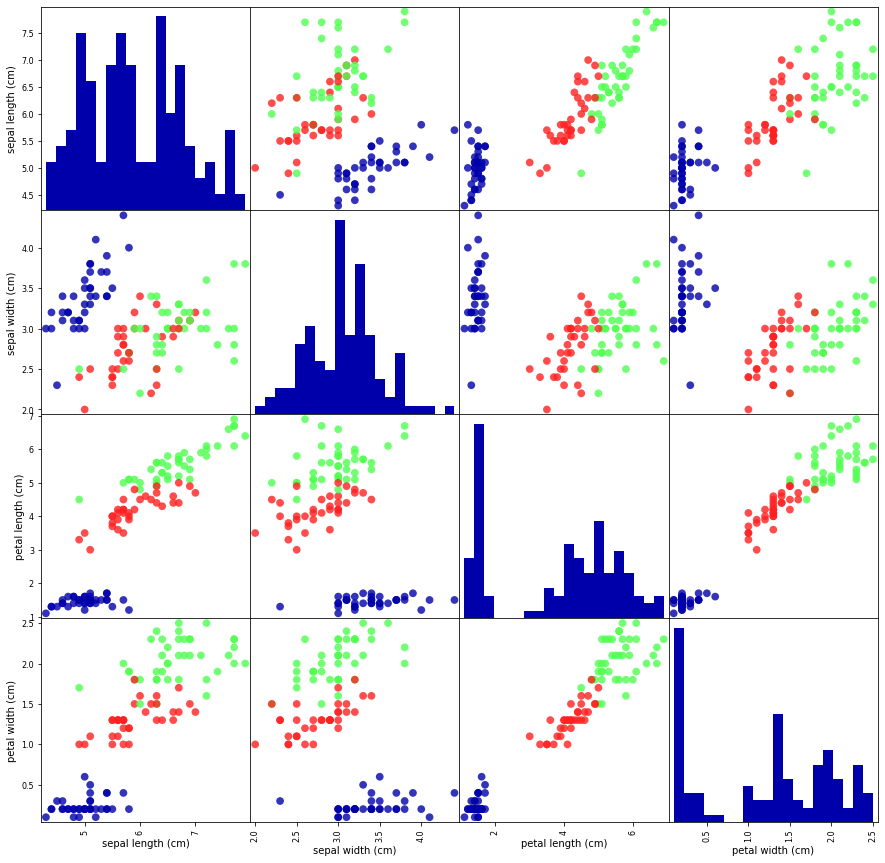

In [162]:
# X_train 데이터를 사용해서 데이터프레임을 만듭니다.
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

#### 첫 번째 머신 러닝 모델: k-최근접 이웃 알고리즘

In [163]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)  #최 근접 숫자 1 (숫자가 적으면 훈련이 덜 되었다. 숫자가 크면 과대적합 위험)

In [164]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### 예측하기

In [165]:
print(X_train)

[[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.3 5.

In [166]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [167]:
prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(
       iris_dataset['target_names'][prediction]))

예측: [0]
예측한 타깃의 이름: ['setosa']


#### 모델 평가하기

In [168]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [169]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.97


In [170]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


### 요약

In [171]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


연습 다른예제로 1)

In [172]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# UCI 머신 러닝 저장소에서 Wine 데이터셋을 다운로드할 수 없을 때
# 다음 주석을 해제하고 로컬 경로에서 데이터셋을 적재하세요.

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('클래스 레이블', np.unique(df_wine['Class label']))
df_wine.head()

클래스 레이블 [1 2 3]


,Class label,Alcohol,Malic acid,Ash,...,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,...,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,...,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,...,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,...,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,...,4.32,1.04,2.93,735


In [173]:
print("df_wine의 키: {}".format(df_wine.keys()))

df_wine의 키: Index(['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


In [174]:
type(df_wine)

pandas.core.frame.DataFrame

In [175]:
df_three = df_wine.iloc[:,1:4]

In [176]:
#lb = ['Alcohol', 'Malic acid', 'Ash']   #Color intensity
#df_three = pd.DataFrame(df_wine, columns=lb)
#df_three

In [177]:
df_wine.shape[1]

14

In [178]:
df_three.columns

Index(['Alcohol', 'Malic acid', 'Ash'], dtype='object')

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_three.values, df_wine.iloc[:,0].values, random_state=0, test_size=0.25)

In [180]:
X_train.size

399

In [181]:
X_test.size

135

In [182]:
winecolumns = ['Alcohol', 'Malic acid', 'Ash']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002108EB79C50>,
      dtype=object)

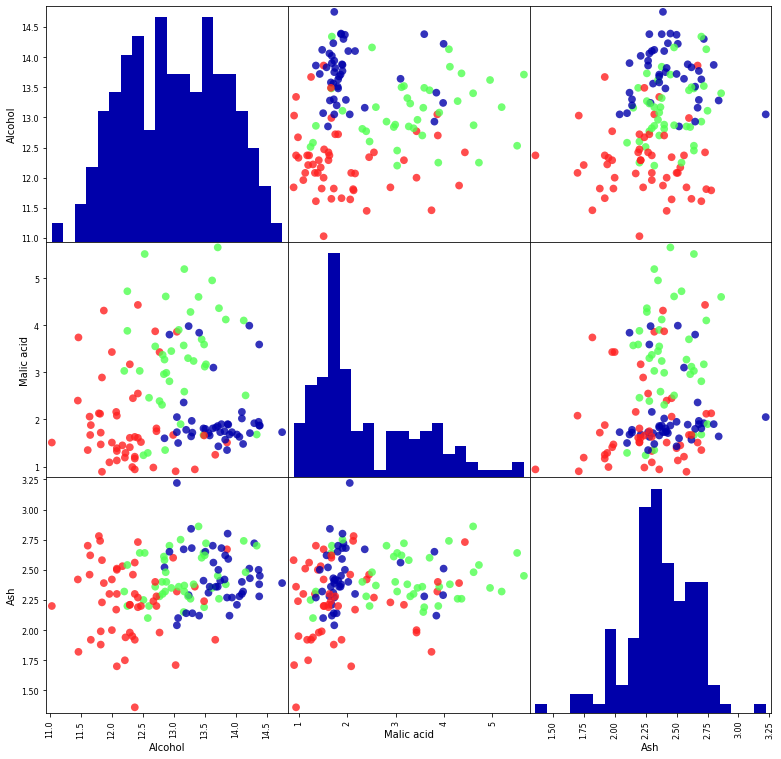

In [183]:
wine_dataframe = pd.DataFrame(X_train, columns=winecolumns)

pd.plotting.scatter_matrix(wine_dataframe, c=y_train, figsize=(13, 13), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [184]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [185]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [186]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

테스트 세트에 대한 예측값:
 [1 3 2 1 3 2 1 2 2 2 3 3 1 2 3 2 1 1 2 1 2 1 3 2 2 2 2 2 2 3 1 1 2 3 1 1 3
 2 2 3 1 1 2 2 2]


In [187]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.91


In [188]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.91


연습 다른예제로 2)

In [189]:
df_three_new = df_wine.loc["Alcohol":"Malic acid"]

In [190]:
df_three_new2 = pd.DataFrame(df_wine,columns=["Alcohol","Malic acid","OD280/OD315 of diluted wines"])

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_three_new2.values, df_wine.iloc[:,0].values, random_state=0, test_size=0.25)

In [192]:
winecolumns2 = ['Alcohol','Malic acid','OD280/OD315 of diluted wines']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002108EB2F8D0>,
      dtype=object)

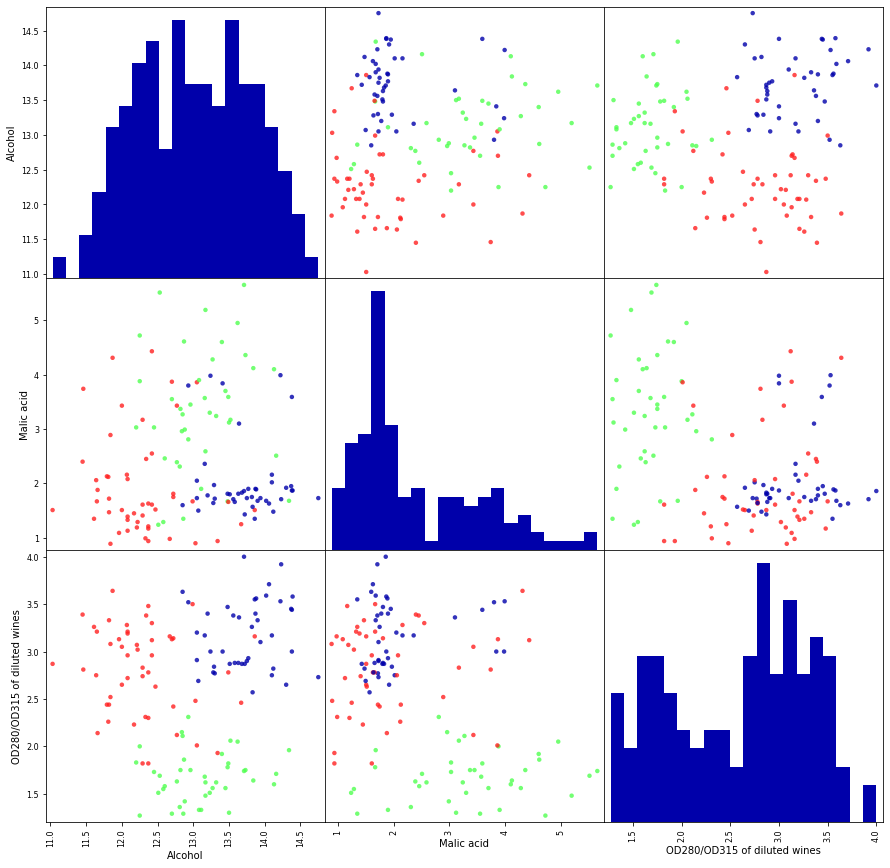

In [193]:
# X_train 데이터를 사용해서 데이터프레임을 만듭니다.
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
wine_dataframe2 = pd.DataFrame(X_train, columns=winecolumns2)
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
pd.plotting.scatter_matrix(wine_dataframe2, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=20, alpha=.8, cmap=mglearn.cm3)

In [194]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [195]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [196]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

테스트 세트에 대한 예측값:
 [1 3 2 1 3 2 1 3 2 2 3 3 1 2 3 2 1 1 3 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1 3
 2 2 3 1 1 2 2 2]


In [197]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.96


In [198]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.96


연습 다른예제로 3)

In [199]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


In [200]:
twoFeature = iris_dataset['data'][0:,:2]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    twoFeature, iris_dataset['target'], random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.76


In [201]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# UCI 머신 러닝 저장소에서 Wine 데이터셋을 다운로드할 수 없을 때
# 다음 주석을 해제하고 로컬 경로에서 데이터셋을 적재하세요.

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('클래스 레이블', np.unique(df_wine['Class label']))
df_wine.size

클래스 레이블 [1 2 3]


2492

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [203]:
df_wine

,Class label,Alcohol,Malic acid,Ash,...,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,...,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,...,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,...,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,...,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,...,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,...,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,...,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,...,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,...,9.30,0.60,1.62,840
